In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

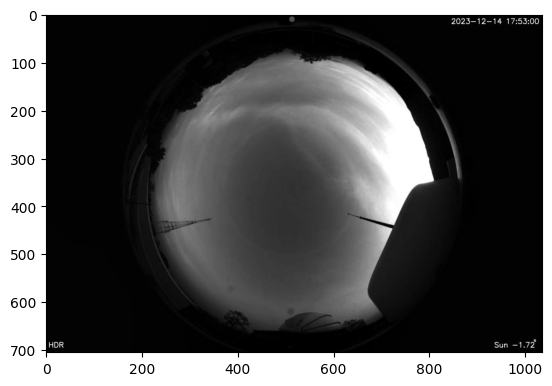

In [33]:
path = r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2023-12\2023-12-14\638381476888254761.png'
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
R,G,B = cv2.split(img)
clahe = cv2.createCLAHE(clipLimit=0.001, tileGridSize=(7,7))
clahe_image = clahe.apply(img)
plt.imshow(clahe_image,cmap='gray')

True

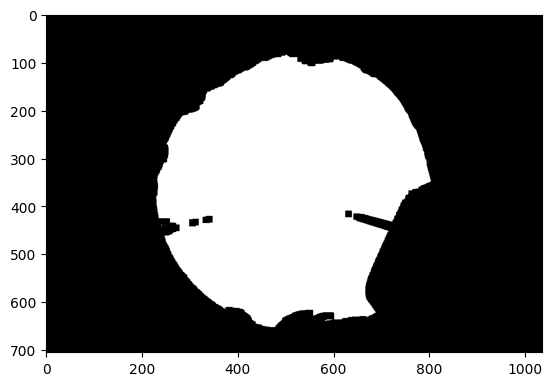

In [49]:
_,thresh = cv2.threshold(clahe_image,40,255,cv2.THRESH_BINARY)
kernel = np.array([
    [1, -1, 1],
    [1, -1, 1],
    [1, -1, 1]
])
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#dilated = cv2.dilate(thresh, kernel, iterations=3)
erosion = cv2.erode(opening, kernel, iterations=6)
plt.imshow(erosion,cmap='gray')
cv2.imwrite('mask_122023.png',erosion)